<a href="https://colab.research.google.com/github/avinashyadav11/Book-Recommendation/blob/main/Book_Recommendations_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Book Recommendation System

- During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. 
- From e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
- In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
- Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. 
- The main objective is to create a book recommendation system for users.


### Content
The Book-Crossing dataset comprises 3 files.
- #### Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
- #### Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors <b>(Image-URL-S,
Image-URL-M, Image-URL-L)</b>, i.e., small, medium, large. These URLs point to the
Amazon website.
- #### Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [1]:
#Importing the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
books= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better/Book Recommendation System/Books.csv', error_bad_lines=False,encoding="latin-1")

In [4]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better/Book Recommendation System/Users.csv' ,error_bad_lines=False, encoding="latin-1")

In [5]:
ratings =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better/Book Recommendation System/Ratings.csv' ,error_bad_lines=False,encoding="latin-1")

In [6]:
# Shape of the books dataset 
books.shape

(271360, 8)

In [7]:
# Shape of ratings dataset
ratings.shape

(1149780, 3)

In [8]:
# Shape of Users dataset
users.shape

(278858, 3)

In [9]:
# Let's see the details of books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
images = books
images = images.drop(['ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S','Image-URL-L'], axis=1)

In [11]:
images.head()

,Book-Title,Image-URL-M
0,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,http://images.amazon.com/images/P/0002005018.0...
2,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...
3,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...
4,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...


In [12]:
# Let's see the details of Users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
# Let's see the details of Ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [15]:
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1) #dropping image features from book data frame

## EDA 

We shall be doing EDA on each dataset one by one <br>

### Rating Dataframe
<br>
Let's check some null values present in the books dataset and we shall try to fill them

In [16]:
# Null values present in author
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [17]:
# Null values in Publisher
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [18]:
# Imputing null values in Author
books.at[187689, 'Book-Author'] = 'Other'

In [19]:
# Imputing null values in publisher
books.at[128890, 'Publisher'] = 'Other'

In [20]:
# Imputing null values in Publisher
books.at[129037, 'Publisher'] = 'Other'

In [21]:
# Let's check year column
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see that some of the values in year column are abdnormal and they need to be removed like
- DK Publishing Inc 
- Gallimard <br>
These values has to be removed from year column

In [22]:
pd.set_option('display.max_colwidth', -1)

In [23]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [24]:
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [25]:
books.at[209538, 'Year-Of-Publication'] =2000
books.at[209538, 'Publisher'] = 'DK Publishing Inc'
books.at[209538, 'Book-Author'] = 'Michael Teitelbaum'
books.at[209538, 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

books.at[221678, 'Year-Of-Publication'] =2000
books.at[221678, 'Publisher'] = 'DK Publishing Inc'
books.at[221678, 'Book-Author'] = 'James Buckley'
books.at[221678, 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

books.at[220731, 'Year-Of-Publication'] =2003
books.at[220731, 'Publisher'] = 'Gallimard'
books.at[220731, 'Book-Author'] = 'Jean-Marie Gustave Le Clezio'
books.at[220731, 'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers'

In [26]:
# let's convert entire year column in integer format 
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [27]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [28]:
y_df = pd.DataFrame(books['Year-Of-Publication'].value_counts())
y_df = y_df.head(25)

In [29]:
books.at[books['Year-Of-Publication'] > 2022] = 2002

In [30]:
books.at[books['Year-Of-Publication'] == 0] = 2002

In [31]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [32]:
# Info of the ratings column
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [33]:
# Checking the null values in the dataset 
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [34]:
# Checking the tendency of ratings dataset with describe
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Text(0.5, 1.0, 'Book Ratings count')

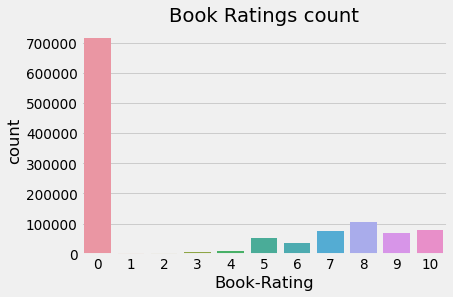

In [35]:
# Checking the distribution of the rating and see the highest number of ratings
plt.style.use('fivethirtyeight')
plt.figure(dpi=70)
sns.countplot(ratings['Book-Rating'])
plt.title('Book Ratings count')

- Here we can see that the rating 0 either shows the users did not read or rated the books.
- It shows that the most of the people either didn't rate or read the books.
- However 8 has been rated second highest after 0.
- So it would be rather better if we drop this 0 rating and do the further analysis on the columns

In [36]:
# Dropping the rating less than 0
ratings_df = ratings[ratings['Book-Rating'] > 0]

Text(0.5, 1.0, 'Book Ratings count')

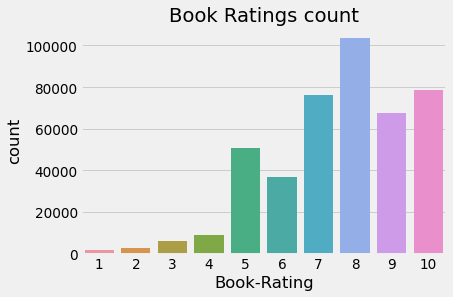

In [37]:
# Plotting the top ratings after removing the 0 rating 
plt.style.use('fivethirtyeight')
plt.figure(dpi=70)
sns.countplot(ratings_df['Book-Rating'])
plt.title('Book Ratings count')

- Now we can see that in the ratings plot most of the books have been rated 8 out of 10 
- The number for 1 rating is lowest among all 
- Second highest ratings have received as 10 and 7 stars
- Let's see these hishest ratings 

In [38]:
# Value counts of the ratings
ratings_df.value_counts().count()

433671

In [39]:
# Finding the highest rated ISBN number of the books and leter we shall plot it 
df = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head(10))
df

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
0060928336,320
059035342X,313
0142001740,307
0446672211,295


Text(0.5, 1.0, 'Top 10 ratings of the books')

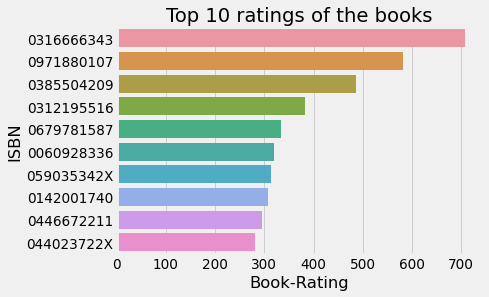

In [40]:
# Plot showing the top 10 most rated books 
plt.figure(dpi=70)
sns.barplot(y=df.index, x=df['Book-Rating'])
# plt.xticks(rotation=90)
plt.title('Top 10 ratings of the books')

- Let's merge the ISBN with the other dataset containing names and see which all these books are 

In [41]:
# Fetching the books name with ISBN number of these top 10 books
df1 = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0679781587', '0060928336',
                    '059035342X', '0142001740', '0446672211','044023722X'], index=np.arange(10), columns=['ISBN'])

In [42]:
# ISBN number with books name 
df1 = pd.merge(df, books, on='ISBN')
df1[['ISBN', 'Book-Rating', 'Book-Title']]

,ISBN,Book-Rating,Book-Title
0,0316666343,707,The Lovely Bones: A Novel
1,0971880107,581,Wild Animus
2,0385504209,487,The Da Vinci Code
3,0312195516,383,The Red Tent (Bestselling Backlist)
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel
5,059035342X,313,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
6,0142001740,307,The Secret Life of Bees
7,0446672211,295,Where the Heart Is (Oprah's Book Club (Paperback))
8,044023722X,281,A Painted House
